# Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
Dataset can be used for Binary classification problems.

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Read the csv file
data = pd.read_csv("BankNote_Authentication.csv")

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Exploring the Dataset

In [4]:
print("Shape of Data before preprocessing: {}".format(data.shape))

Shape of Data before preprocessing: (1372, 5)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
# Stastical analysis of the data
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# Checking the duplicate value
data.duplicated().sum()

24

In [8]:
# Dropping all the duplicate values
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [9]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<AxesSubplot:>

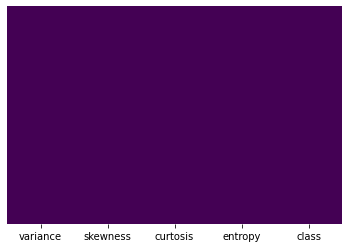

In [10]:
# Checking the null values
sns.heatmap(data.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

There is no missing values in the dataset.

In [11]:
# Detecting the ouliers
def detect_outlier(data):
    outlier = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [12]:
var_list = data['variance'].tolist()
skew_list = data['skewness'].tolist()
curt_list = data['curtosis'].tolist()
entr_list = data['entropy'].tolist()

In [13]:
var_outlier = detect_outlier(var_list)
var_outlier

[]

In [14]:
skew_outlier = detect_outlier(skew_list)
skew_outlier

[]

In [15]:
curt_outlier = detect_outlier(curt_list)
curt_outlier

[15.6824,
 17.6772,
 14.9704,
 17.3087,
 15.5573,
 17.9274,
 16.9583,
 14.8881,
 17.5795,
 15.6773,
 17.6052,
 15.6199,
 17.1116,
 15.6559,
 17.0834,
 15.4417,
 16.7166,
 15.1606,
 17.5932]

In [16]:
entr_outlier = detect_outlier(entr_list)
entr_outlier

[-7.5034,
 -7.5836,
 -7.5034,
 -7.7853,
 -7.7581,
 -8.5482,
 -7.5487,
 -7.6418,
 -7.8719,
 -7.6612,
 -7.5034,
 -7.5344,
 -7.5887,
 -7.5642,
 -7.5887]

In [17]:
# Shape of Data before removing the outliers
print("Shape of Data before removing outliers: {}".format(data.shape))

Shape of Data before removing outliers: (1348, 5)


In [18]:
# Removing the outliers
data.drop(data[data['curtosis'] >= 14.8881].index, inplace = True)
data.drop(data[data['entropy'] <= -7.5034].index, inplace = True)

In [19]:
#Shape of Data after removing the outliers
print("Shape of Data before after outliers: {}".format(data.shape))

Shape of Data before after outliers: (1314, 5)


## Exploratory Data Analysis

0    0.554033
1    0.445967
Name: class, dtype: float64

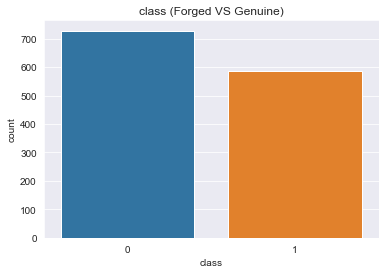

In [20]:
plt.figure(figsize =(6,4))
sns.set_style('darkgrid')
sns.countplot(x = 'class', data = data)
plt.title('class (Forged VS Genuine)')
data['class'].value_counts(normalize = True)

In a dataset, Forged Note and Genuine Note are around 56% and 44% respectively.<br>
The datset looks like a balanced dataset.

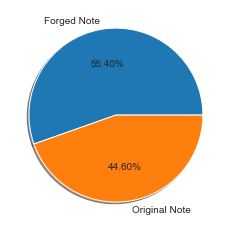

In [21]:
plt.pie(data['class'].value_counts(), labels = ['Forged Note', 'Original Note'], shadow = True, autopct = '%1.2f%%');

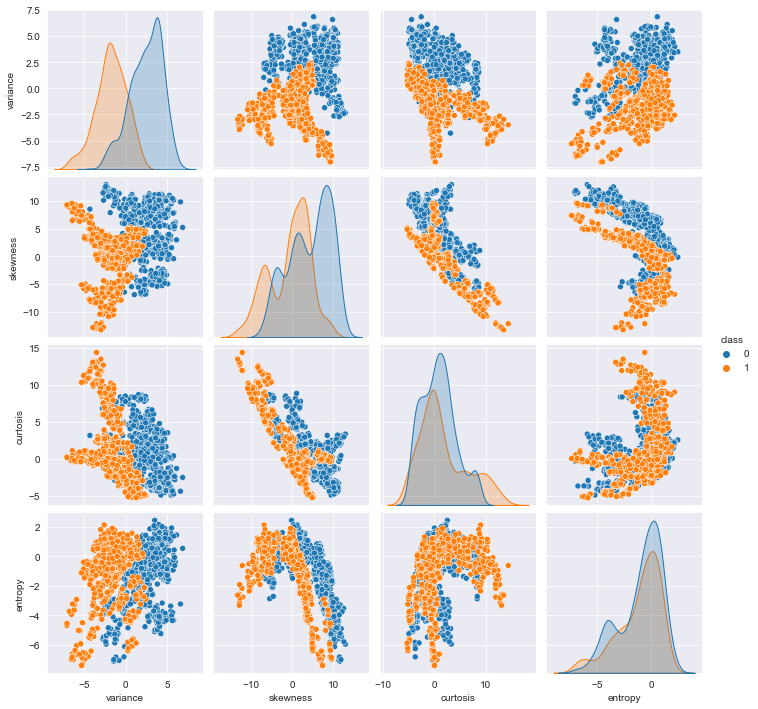

In [22]:
sns.pairplot(data, hue='class') 

<AxesSubplot:>

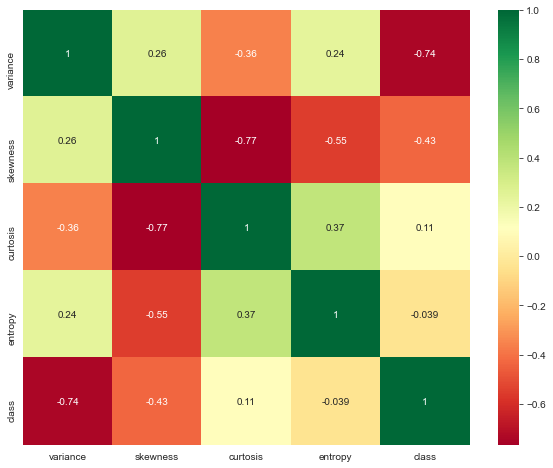

In [23]:
corrmat = data.corr()
plt.figure(figsize=(10,8))
#plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [24]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [25]:
# Split the Dataset
X = data.drop(['class'], axis = 1)
y = data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data Modelling

### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dtc.predict(X_train)
print(accuracy_score(y_pred, y_train))

1.0


In [29]:
y_pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(accuracy_score(y_pred_dtc, y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       173
           1       0.99      0.96      0.97       156

    accuracy                           0.98       329
   macro avg       0.98      0.97      0.98       329
weighted avg       0.98      0.98      0.98       329

[[171   2]
 [  6 150]]
0.9756838905775076


### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred_1 = rfc.predict(X_train)
print(accuracy_score(y_pred_1, y_train))

1.0


In [32]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(accuracy_score(y_pred_rfc, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       156

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

[[173   0]
 [  0 156]]
1.0


### KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred_2 = knn.predict(X_train)
print(accuracy_score(y_pred_2, y_train))

1.0


In [35]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       156

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

[[173   0]
 [  0 156]]
1.0


Out of above 3 algorithms RandomForestClassifier and KNeighborsClassifier performs well for this dataset. I will choose RandomForestClassifier

In [36]:
# prepare the cross-validation procedure
from sklearn.model_selection import KFold
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

random_grid = {'max_features': max_features,
              'n_estimators': n_estimators}
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# RandomizedSearchCV, using 10 fold cross validation
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,scoring='accuracy', 
                               cv = cv, verbose=2, random_state=42, n_jobs = 1)

In [37]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=100, max_features=auto .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. n_estimators=100, max_features=auto, total=   0.3s
[CV] n_estimators=100, max_features=auto .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .............. n_estimators=100, max_features=auto, total=   0.4s
[CV] n_estimators=100, max_features=auto .............................
[CV] .............. n_estimators=100, max_features=auto, total=   0.3s
[CV] n_estimators=100, max_features=auto .............................
[CV] .............. n_estimators=100, max_features=auto, total=   0.4s
[CV] n_estimators=100, max_features=auto .............................
[CV] .............. n_estimators=100, max_features=auto, total=   0.4s
[CV] n_estimators=100, max_features=auto .............................
[CV] .............. n_estimators=100, max_features=auto, total=   0.3s
[CV] n_estimators=100, max_features=auto .............................
[CV] .............. n_estimators=100, max_features=auto, total=   0.4s
[CV] n_estimators=100, max_features=auto .............................
[CV] .............. n_estimators=100, max_features=auto, total=   0.4s
[CV] n_estimators=100, max_features=auto .............................
[CV] .

[CV] .............. n_estimators=100, max_features=sqrt, total=   0.4s
[CV] n_estimators=200, max_features=sqrt .............................
[CV] .............. n_estimators=200, max_features=sqrt, total=   0.7s
[CV] n_estimators=200, max_features=sqrt .............................
[CV] .............. n_estimators=200, max_features=sqrt, total=   0.7s
[CV] n_estimators=200, max_features=sqrt .............................
[CV] .............. n_estimators=200, max_features=sqrt, total=   0.8s
[CV] n_estimators=200, max_features=sqrt .............................
[CV] .............. n_estimators=200, max_features=sqrt, total=   0.8s
[CV] n_estimators=200, max_features=sqrt .............................
[CV] .............. n_estimators=200, max_features=sqrt, total=   0.7s
[CV] n_estimators=200, max_features=sqrt .............................
[CV] .............. n_estimators=200, max_features=sqrt, total=   0.7s
[CV] n_estimators=200, max_features=sqrt .............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [38]:
predictions=rf_random.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       156

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

[[173   0]
 [  0 156]]
1.0


After applying KFold cross validation the accuracy score remains same.

In [39]:
import pickle
# open a file, where you ant to store the data
file = open('random_model.pkl', 'wb')

# dump information to that file
pickle.dump(rfc, file)
file.close()